In [3]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from matplotlib.colors import rgb2hex
from scipy import stats
from scipy.stats import ranksums

In [4]:
os.chdir("/condo/wanglab/tmhtxt85/Project/omiclip_Weiqing/")

In [5]:
all_simu_dir = './results/simulation_data/'

In [6]:
files = os.listdir("./results/simulation_data/")
files.remove('.ipynb_checkpoints')
files.remove('file_name.txt')

In [7]:
all_samples=pd.DataFrame()
# files = pd.read_csv("./results/simulation_data/file_name.txt",sep="\t",header=None, index_col=0)
for f in files:
    try:
        # if f in bad:
            all_simu_dir = './results/simulation_data/'
            raw_data_name = f
            print(raw_data_name)
            simu_dataset_dir = all_simu_dir+raw_data_name+'/'
            result_dir = simu_dataset_dir+'omiclip_results/'
            all_result = pd.DataFrame()
            omiclip_distance = pd.DataFrame()
            for level in ['lowly', 'medium', 'highly']:
                distance = pd.read_csv(result_dir+level+'_noisy_omiclip_aligned_st_to_st_distance.csv', index_col=0)
                del distance["dist_raw"]
                distance.columns = distance.columns+'_'+level+'_'+"ST_ST"
                omiclip_distance = pd.concat([omiclip_distance, distance], axis=1)

            all_result = pd.concat([all_result, omiclip_distance], axis=1)
            print(len(omiclip_distance))

            omiclip_distance = pd.DataFrame()
            for level in ['lowly', 'medium', 'highly']:
                distance = pd.read_csv(result_dir+level+'_noisy_omiclip_aligned_img_to_st_distance.csv', index_col=0)
                del distance["dist_raw"]
                distance.columns = distance.columns+'_'+level+'_'+"Img_ST"
                omiclip_distance = pd.concat([omiclip_distance, distance], axis=1)

            all_result = pd.concat([all_result, omiclip_distance], axis=1)
            print(len(omiclip_distance))


            result_dir = simu_dataset_dir+'paste_results/'
            paste_distance = pd.DataFrame()
            for level in ['lowly', 'medium', 'highly']:
                distance = pd.read_csv(result_dir+level+'_noisy_paste_aligned_distance.csv', index_col=0)
                distance.columns = distance.columns+'_'+level
                paste_distance = pd.concat([paste_distance, distance], axis=1)
            all_result = pd.concat([all_result, paste_distance], axis=1)   
            print(len(paste_distance))

            result_dir = simu_dataset_dir+'gpsa_results/'
            gpsa_distance = pd.DataFrame()
            for level in ['lowly', 'medium', 'highly']:
                distance = pd.read_csv(result_dir+level+'_noisy_gpsa_aligned_distance.csv', index_col=0)
                distance.columns = distance.columns+'_'+level
                gpsa_distance = pd.concat([gpsa_distance, distance], axis=1)
            print(len(gpsa_distance))
            all_result = pd.concat([all_result, gpsa_distance], axis=1)
            print(len(all_result))
            all_samples = pd.concat([all_samples, all_result], axis=0)
            print(len(all_samples))
            # plt.figure(figsize=(45, 30))
            # sns.boxplot(all_result, showfliers=False)
            # plt.title(f"{raw_data_name}", fontsize=40)
            # plt.xticks(fontsize=30,rotation=90)
            # plt.yticks(fontsize=30)
            # plt.show()
    except FileNotFoundError:
        pass

10X_Visium_Barkley2022Cancer_GSM6177599_NYU_BRCA0_Vis_processed_data
30
30
30
27
50
50
GSM6256810
30
30
30
30
30
80
HCC-5A
30
30
30
29
30
110
V10F24_076_D1
30
30
30
30
30
140
V19T26-028_C1
30
30
30
29
30
170
data514_breast_cancer_9sample_P1B_ER
30
30
30
30
30
200
data533_prostatecancer_24sample_patient2_V1_5
30
30
30
30
30
230
data537_tonsil_8sample_V19T26-010_C1
30
30
30
30
30
260
data64_10x_prostate_cancer_1sample_processed_data
30
30
30
26
30
290
data76_10x_Invasive_Adenocarcinoma_1sample_processed_data
30
30
30
30
30
320


In [8]:
all_samples

,dist_homo_lowly_ST_ST,dist_homo_medium_ST_ST,dist_homo_highly_ST_ST,dist_homo_lowly_Img_ST,dist_homo_medium_Img_ST,dist_homo_highly_Img_ST,paste_distance_lowly,paste_distance_medium,paste_distance_highly,gpsa_distance_lowly,gpsa_distance_medium,gpsa_distance_highly
adata_simulation_nb0.03_ang-2.14_cutx0.01_cuty0.02.h5ad,3.149112,NaN,NaN,29.496308,NaN,NaN,13.927812,NaN,NaN,84.094154,NaN,NaN
adata_simulation_nb0.02_ang-3.69_cutx0.01_cuty0.02.h5ad,3.707538,NaN,NaN,29.741862,NaN,NaN,13.129512,NaN,NaN,115.565636,NaN,NaN
adata_simulation_nb0.04_ang4.89_cutx0.02_cuty0.02.h5ad,6.903174,NaN,NaN,41.201935,NaN,NaN,22.320532,NaN,NaN,146.893835,NaN,NaN
adata_simulation_nb0.01_ang-3.71_cutx0.01_cuty0.02.h5ad,7.686974,NaN,NaN,33.887406,NaN,NaN,15.905189,NaN,NaN,108.186590,NaN,NaN
adata_simulation_nb0.03_ang-1.89_cutx0.02_cuty0.01.h5ad,1.513070,NaN,NaN,38.646321,NaN,NaN,22.545589,NaN,NaN,61.554760,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
adata_simulation_nb0.34_ang-16.98_cutx0.13_cuty0.12.h5ad,NaN,NaN,40.982777,NaN,NaN,81.337341,NaN,NaN,422.748585,NaN,NaN,266.417010
adata_simulation_nb0.34_ang20.07_cutx0.12_cuty0.09.h5ad,NaN,NaN,47.556844,NaN,NaN,46.673939,NaN,NaN,92.993779,NaN,NaN,463.685613
adata_simulation_nb0.31_ang18.75_cutx0.12_cuty0.08.h5ad,NaN,NaN,49.490388,NaN,NaN,36.848819,NaN,NaN,94.910402,NaN,NaN,480.801982
adata_simulation_nb0.41_ang28.91_cutx0.14_cuty0.14.h5ad,NaN,NaN,78.508005,NaN,NaN,86.661846,NaN,NaN,137.003851,NaN,NaN,534.433675


In [9]:
ranksums(all_samples['paste_distance_highly'], all_samples['dist_homo_highly_Img_ST'], alternative='greater', nan_policy='omit')

RanksumsResult(statistic=5.465860940501096, pvalue=2.3033269120010343e-08)

In [10]:
ranksums(all_samples['gpsa_distance_highly'], all_samples['dist_homo_highly_Img_ST'], alternative='greater', nan_policy='omit')

RanksumsResult(statistic=12.21205765785627, pvalue=1.34011871620817e-34)

In [11]:
ranksums(all_samples['dist_homo_highly_Img_ST'], all_samples['dist_homo_highly_ST_ST'], alternative='greater', nan_policy='omit')

RanksumsResult(statistic=7.625816716720572, pvalue=1.2124708172362736e-14)

In [12]:
ranksums(all_samples['paste_distance_medium'], all_samples['dist_homo_medium_Img_ST'], alternative='greater', nan_policy='omit')

RanksumsResult(statistic=3.5135932196873383, pvalue=0.00022104462988484095)

In [13]:
ranksums(all_samples['gpsa_distance_medium'], all_samples['dist_homo_medium_Img_ST'], alternative='greater', nan_policy='omit')

RanksumsResult(statistic=12.154780683637886, pvalue=2.705339766899682e-34)

In [14]:
ranksums(all_samples['dist_homo_medium_Img_ST'], all_samples['dist_homo_medium_ST_ST'], alternative='greater', nan_policy='omit')

RanksumsResult(statistic=8.603172271571013, pvalue=3.877122588236647e-18)

In [15]:
ranksums(all_samples['paste_distance_lowly'], all_samples['dist_homo_lowly_Img_ST'], alternative='greater', nan_policy='omit')

RanksumsResult(statistic=-0.9846857215118201, pvalue=0.8376107657704814)

In [16]:
ranksums(all_samples['gpsa_distance_lowly'], all_samples['dist_homo_lowly_Img_ST'], alternative='greater', nan_policy='omit')

RanksumsResult(statistic=10.759512229898755, pvalue=2.672616769281504e-27)

In [17]:
ranksums(all_samples['dist_homo_lowly_Img_ST'], all_samples['dist_homo_lowly_ST_ST'], alternative='greater', nan_policy='omit')

RanksumsResult(statistic=11.359314936249259, pvalue=3.333267503195365e-30)

In [18]:
all_samples_sort = all_samples[['dist_homo_lowly_ST_ST', 'dist_homo_lowly_Img_ST', 'paste_distance_lowly', 'gpsa_distance_lowly',
             'dist_homo_medium_ST_ST', 'dist_homo_medium_Img_ST', 'paste_distance_medium', 'gpsa_distance_medium',
             'dist_homo_highly_ST_ST', 'dist_homo_highly_Img_ST', 'paste_distance_highly', 'gpsa_distance_highly',
            ]]

In [19]:
all_samples_sort

,dist_homo_lowly_ST_ST,dist_homo_lowly_Img_ST,paste_distance_lowly,gpsa_distance_lowly,dist_homo_medium_ST_ST,dist_homo_medium_Img_ST,paste_distance_medium,gpsa_distance_medium,dist_homo_highly_ST_ST,dist_homo_highly_Img_ST,paste_distance_highly,gpsa_distance_highly
adata_simulation_nb0.03_ang-2.14_cutx0.01_cuty0.02.h5ad,3.149112,29.496308,13.927812,84.094154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adata_simulation_nb0.02_ang-3.69_cutx0.01_cuty0.02.h5ad,3.707538,29.741862,13.129512,115.565636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adata_simulation_nb0.04_ang4.89_cutx0.02_cuty0.02.h5ad,6.903174,41.201935,22.320532,146.893835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adata_simulation_nb0.01_ang-3.71_cutx0.01_cuty0.02.h5ad,7.686974,33.887406,15.905189,108.186590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adata_simulation_nb0.03_ang-1.89_cutx0.02_cuty0.01.h5ad,1.513070,38.646321,22.545589,61.554760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
adata_simulation_nb0.34_ang-16.98_cutx0.13_cuty0.12.h5ad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.982777,81.337341,422.748585,266.417010
adata_simulation_nb0.34_ang20.07_cutx0.12_cuty0.09.h5ad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.556844,46.673939,92.993779,463.685613
adata_simulation_nb0.31_ang18.75_cutx0.12_cuty0.08.h5ad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.490388,36.848819,94.910402,480.801982
adata_simulation_nb0.41_ang28.91_cutx0.14_cuty0.14.h5ad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.508005,86.661846,137.003851,534.433675


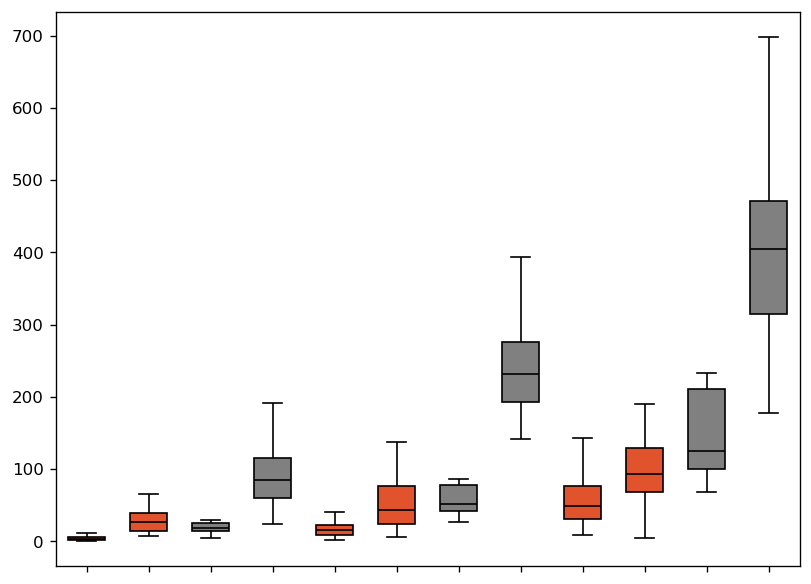

In [20]:
plt.figure(figsize=(8,6), dpi=120)
sns.boxplot(all_samples_sort, showfliers=False, width=0.6, linecolor = 'black', linewidth=1, palette=['#FE420F','#FE420F','grey', 'grey',
                                                                                                      '#FE420F','#FE420F','grey', 'grey',
                                                                                                 '#FE420F','#FE420F','grey', 'grey',],)
plt.tick_params(labelbottom=False) 
# plt.ylim((0.0,0.5))

In [21]:
all_samples_sort = all_samples[[
             'dist_homo_medium_ST_ST', 'dist_homo_medium_Img_ST', 'paste_distance_medium', 'gpsa_distance_medium',
             'dist_homo_highly_ST_ST', 'dist_homo_highly_Img_ST', 'paste_distance_highly', 'gpsa_distance_highly',
            ]]

In [22]:
all_samples_sort

,dist_homo_medium_ST_ST,dist_homo_medium_Img_ST,paste_distance_medium,gpsa_distance_medium,dist_homo_highly_ST_ST,dist_homo_highly_Img_ST,paste_distance_highly,gpsa_distance_highly
adata_simulation_nb0.03_ang-2.14_cutx0.01_cuty0.02.h5ad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adata_simulation_nb0.02_ang-3.69_cutx0.01_cuty0.02.h5ad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adata_simulation_nb0.04_ang4.89_cutx0.02_cuty0.02.h5ad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adata_simulation_nb0.01_ang-3.71_cutx0.01_cuty0.02.h5ad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adata_simulation_nb0.03_ang-1.89_cutx0.02_cuty0.01.h5ad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
adata_simulation_nb0.34_ang-16.98_cutx0.13_cuty0.12.h5ad,NaN,NaN,NaN,NaN,40.982777,81.337341,422.748585,266.417010
adata_simulation_nb0.34_ang20.07_cutx0.12_cuty0.09.h5ad,NaN,NaN,NaN,NaN,47.556844,46.673939,92.993779,463.685613
adata_simulation_nb0.31_ang18.75_cutx0.12_cuty0.08.h5ad,NaN,NaN,NaN,NaN,49.490388,36.848819,94.910402,480.801982
adata_simulation_nb0.41_ang28.91_cutx0.14_cuty0.14.h5ad,NaN,NaN,NaN,NaN,78.508005,86.661846,137.003851,534.433675


In [23]:
col_l1=['low','low','low','low','high','high','high','high',]
col_l2=['ST_ST','Img_ST','paste','gpsa','ST_ST','Img_ST','paste','gpsa',]
all_samples_sort.columns = pd.MultiIndex.from_arrays([col_l1,col_l2, all_samples_sort.columns],names=['L0','L1','L2'])

In [24]:
all_samples_sort

L0                                                                    low  \
L1                                                                  ST_ST   
L2                                                 dist_homo_medium_ST_ST   
adata_simulation_nb0.03_ang-2.14_cutx0.01_cuty0...                    NaN   
adata_simulation_nb0.02_ang-3.69_cutx0.01_cuty0...                    NaN   
adata_simulation_nb0.04_ang4.89_cutx0.02_cuty0....                    NaN   
adata_simulation_nb0.01_ang-3.71_cutx0.01_cuty0...                    NaN   
adata_simulation_nb0.03_ang-1.89_cutx0.02_cuty0...                    NaN   
...                                                                   ...   
adata_simulation_nb0.34_ang-16.98_cutx0.13_cuty...                    NaN   
adata_simulation_nb0.34_ang20.07_cutx0.12_cuty0...                    NaN   
adata_simulation_nb0.31_ang18.75_cutx0.12_cuty0...                    NaN   
adata_simulation_nb0.41_ang28.91_cutx0.14_cuty0...                    NaN   
adata_simulation_nb0.28_ang23.04_cutx0.14_cuty0...                    NaN   

L0                                                                          \
L1                                                                  Img_ST   
L2                                                 dist_homo_medium_Img_ST   
adata_simulation_nb0.03_ang-2.14_cutx0.01_cuty0...                     NaN   
adata_simulation_nb0.02_ang-3.69_cutx0.01_cuty0...                     NaN   
adata_simulation_nb0.04_ang4.89_cutx0.02_cuty0....                     NaN   
adata_simulation_nb0.01_ang-3.71_cutx0.01_cuty0...                     NaN   
adata_simulation_nb0.03_ang-1.89_cutx0.02_cuty0...                     NaN   
...                                                                    ...   
adata_simulation_nb0.34_ang-16.98_cutx0.13_cuty...                     NaN   
adata_simulation_nb0.34_ang20.07_cutx0.12_cuty0...                     NaN   
adata_simulation_nb0.31_ang18.75_cutx0.12_cuty0...                     NaN   
adata_simulation_nb0.41_ang28.91_cutx0.14_cuty0...                     NaN   
adata_simulation_nb0.28_ang23.04_cutx0.14_cuty0...                     NaN   

L0                                                                        \
L1                                                                 paste   
L2                                                 paste_distance_medium   
adata_simulation_nb0.03_ang-2.14_cutx0.01_cuty0...                   NaN   
adata_simulation_nb0.02_ang-3.69_cutx0.01_cuty0...                   NaN   
adata_simulation_nb0.04_ang4.89_cutx0.02_cuty0....                   NaN   
adata_simulation_nb0.01_ang-3.71_cutx0.01_cuty0...                   NaN   
adata_simulation_nb0.03_ang-1.89_cutx0.02_cuty0...                   NaN   
...                                                                  ...   
adata_simulation_nb0.34_ang-16.98_cutx0.13_cuty...                   NaN   
adata_simulation_nb0.34_ang20.07_cutx0.12_cuty0...                   NaN   
adata_simulation_nb0.31_ang18.75_cutx0.12_cuty0...                   NaN   
adata_simulation_nb0.41_ang28.91_cutx0.14_cuty0...                   NaN   
adata_simulation_nb0.28_ang23.04_cutx0.14_cuty0...                   NaN   

L0                                                                       \
L1                                                                 gpsa   
L2                                                 gpsa_distance_medium   
adata_simulation_nb0.03_ang-2.14_cutx0.01_cuty0...                  NaN   
adata_simulation_nb0.02_ang-3.69_cutx0.01_cuty0...                  NaN   
adata_simulation_nb0.04_ang4.89_cutx0.02_cuty0....                  NaN   
adata_simulation_nb0.01_ang-3.71_cutx0.01_cuty0...                  NaN   
adata_simulation_nb0.03_ang-1.89_cutx0.02_cuty0...                  NaN   
...                                                                 ...   
adata_simulation_nb0.34_ang-16.98_cutx0.13_cuty...                  NaN   
adata_simulat

In [25]:
all_samples_sort_melt = pd.melt(all_samples_sort)
all_samples_sort_melt

,L0,L1,L2,value
0,low,ST_ST,dist_homo_medium_ST_ST,NaN
1,low,ST_ST,dist_homo_medium_ST_ST,NaN
2,low,ST_ST,dist_homo_medium_ST_ST,NaN
3,low,ST_ST,dist_homo_medium_ST_ST,NaN
4,low,ST_ST,dist_homo_medium_ST_ST,NaN
...,...,...,...,...
2555,high,gpsa,gpsa_distance_highly,266.417010
2556,high,gpsa,gpsa_distance_highly,463.685613
2557,high,gpsa,gpsa_distance_highly,480.801982
2558,high,gpsa,gpsa_distance_highly,534.433675


<Axes: xlabel='L0', ylabel='value'>

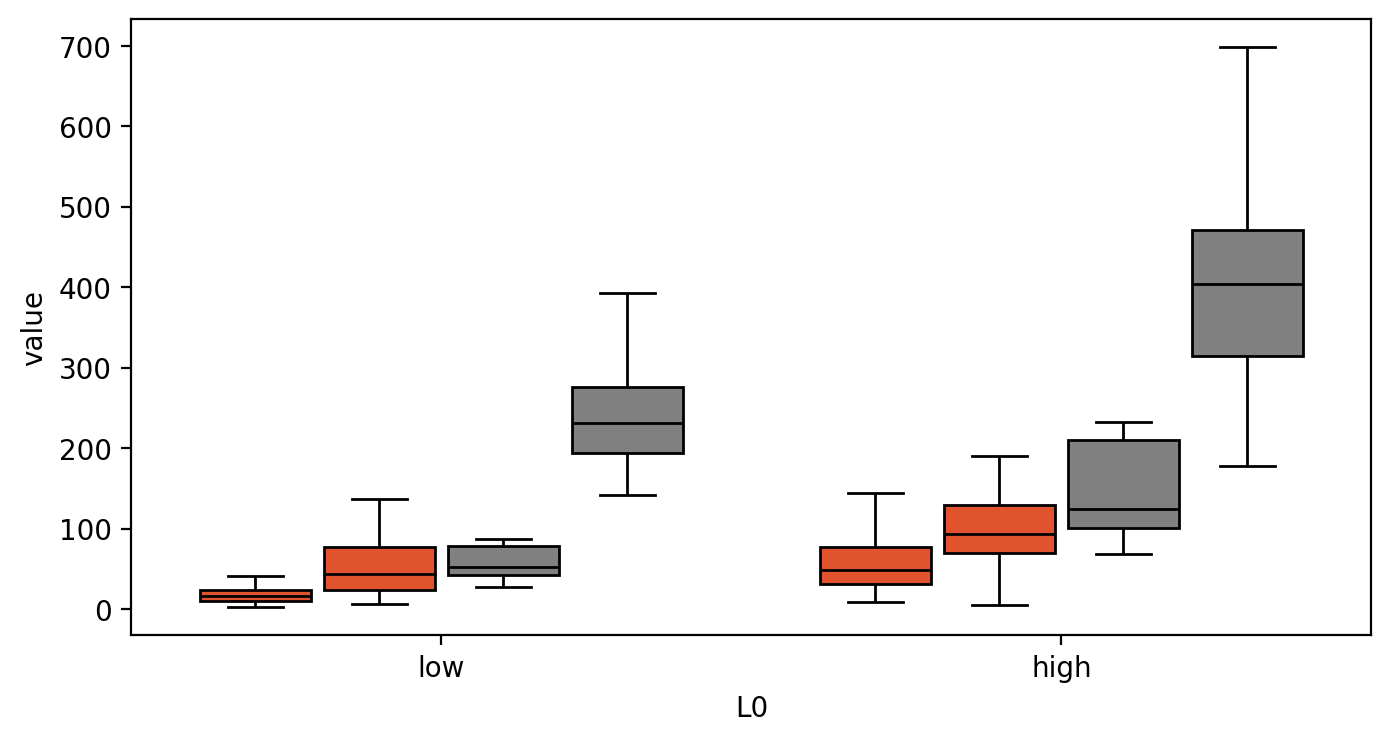

In [29]:
plt.figure(figsize=(8, 4), dpi=200)
sns.boxplot(data = all_samples_sort_melt, x='L0',  y='value',hue='L1',
            legend=False, gap=0.1,
            showfliers=False,
            linecolor = 'black', linewidth=1,
            palette=['#FE420F','#FE420F','grey', 'grey',]
)